# Second-order model

## Dynamics of the Heater/Sensor System

The previous results are not yet fully satisfactory. We're still missing the initial 'lag' in response of the measured temperature. 

For this third model, we consider the possibility that the heater and sensor may not be at the same temperature. In other words, that the heater/sensor assembly is not at a uniform temperature. To account for this possibility, we introduce $T_{H,1}$ to denote the temperature of heater one and $T_{S,1}$ to denote the temperature of the corresponding sensor. We'll further assume that sensor mainly exchanges heat with the heater, and the dominant heat transfer to the surroundings is through the heat sink attached to the heater.

This motivates a model

\begin{align}
C^H_p\frac{dT_{H,1}}{dt} & = U_a(T_{amb} - T_{H,1}) + U_b(T_{S,1} - T_{H,1}) + \alpha P_1u_1\\
C^S_p\frac{dT_{S,1}}{dt} & = U_b(T_{H,1} - T_{S,1}) 
\end{align}

where $C^H_p$ and $C^S_p$ are the gross heat capacities of the heater and sensor, respectively, and $U_b$ is a new heat transfer coefficient characterizing the exchange of heat between the heater and sensor.

\begin{align}
\frac{dT_{H,1}}{dt} & = -\frac{U_a+U_b}{C^H_p}T_{H,1} + \frac{U_b}{C^H_p}T_{S,1} + \frac{\alpha P_1}{C^H_p}u_1 + \frac{U_a}{C^H_p}T_{amb}\\
\frac{dT_{S,1}}{dt} & = \frac{U_b}{C^S_p}(T_{H,1} - T_{S,1}) 
\end{align}

Where measured temperature, that is, the temperature recorded by the Arduino, $T_1$ is given by

$$T_1 = T_{S,1}$$

Time
0.0     -0.221000
10.0     0.371773
20.0     0.895562
30.0     1.395004
40.0     1.774688
           ...   
560.0   -0.210368
570.0   -0.188967
580.0   -0.148499
590.0   -0.323733
600.0    0.093363
Name: T1, Length: 61, dtype: float64

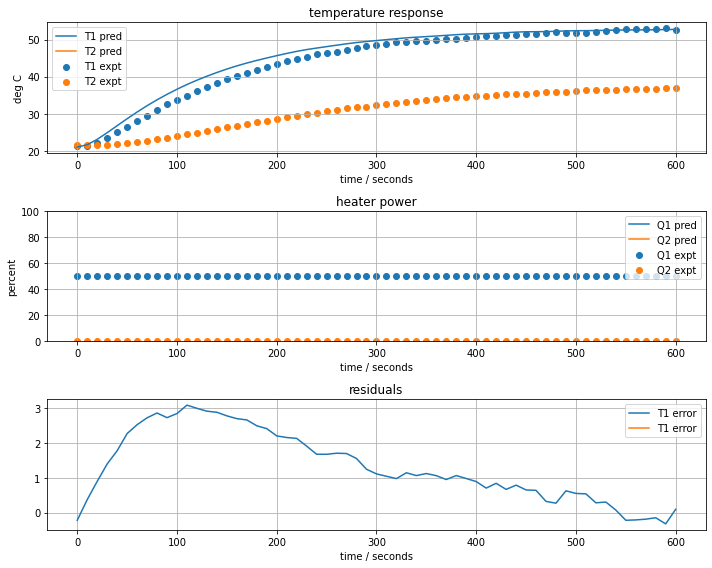

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# adjustable parameters
CpH = 5                # joules/deg C
CpS = 1                # joules/deg C
Ua = 0.05              # watts/deg C
Ub = 0.05              # watts/deg C


def model_energy_second_order(param, plot=False):
    # unpack the adjustable parameters
    CpH, CpS, Ua, Ub = param

    # model solution
    def deriv(t, y):
        T1H, T1S = y
        dT1H = (-(Ua + Ub)*T1H + Ub*T1S + alpha*P1*u1(t) + Ua*T_amb)/CpH
        dT1S = Ub*(T1H - T1S)/CpS
        return [dT1H, dT1S]

    soln = solve_ivp(deriv, [min(t_expt), max(t_expt)], [T_amb, T_amb], t_eval=t_expt) 
    
    # create dataframe with predictions
    pred = pd.DataFrame(columns=["T1", "T2", "Q1", "Q2"], index=t_expt)
    pred["T1"] = soln.y[1]

    # plot solution
    if plot:
        ax = plot_data(expt, pred)
        
    return pred["T1"] - expt["T1"]
    
model_energy_second_order([CpH, CpS, Ua, Ub], plot=True)

### Best fit

CpH = 2.1819127156760283,  CpS = 1.878312055293452,   Ua = 0.04956661570349656,  Ub = 0.021187799850674392


Time
0.0     -0.221000
10.0     0.104481
20.0     0.063797
30.0    -0.007664
40.0    -0.117127
           ...   
560.0   -0.289049
570.0   -0.245878
580.0   -0.203222
590.0   -0.386367
600.0    0.039925
Name: T1, Length: 61, dtype: float64

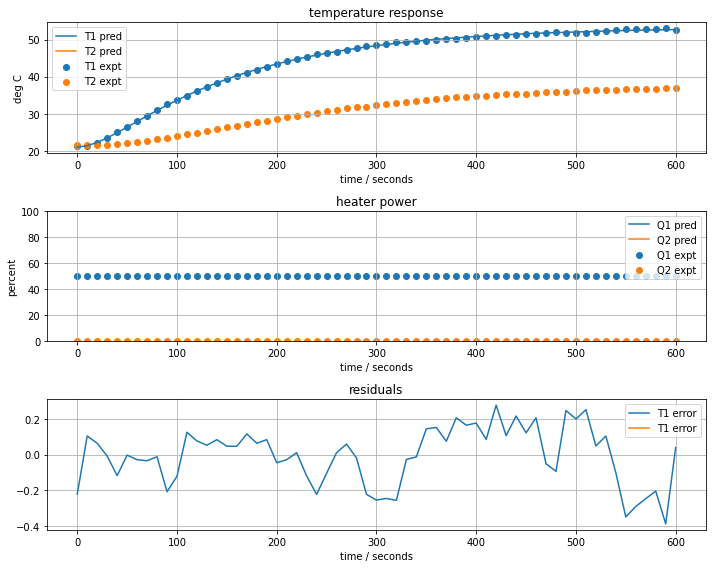

In [12]:
results = least_squares(model_energy_second_order,  [CpH, CpS, Ua, Ub])
CpH, CpS, Ua, Ub = results.x
print(f"CpH = {CpH},  CpS = {CpS},   Ua = {Ua},  Ub = {Ub}")
model_energy_second_order(results.x, True)

## Fourth-Order Multi-Input Multi-Output Model

### Model derivation

\begin{align}
C^H_p\frac{dT_{H,1}}{dt} & = U_a(T_{amb} - T_{H,1}) + U_b(T_{S,1} - T_{H,1}) + U_c(T_{H,2}-T_{H,1})  + \alpha P_1u_1\\
C^S_p\frac{dT_{S,1}}{dt} & = U_b(T_{H,1} - T_{S,1})  \\
C^H_p\frac{dT_{H,2}}{dt} & = U_a(T_{amb} - T_{H,2}) + U_b(T_{S,2} - T_{H,2}) + U_c(T_{H,1}-T_{H,2}) + \alpha P_2 u_2\\
C^S_p\frac{dT_{S,2}}{dt} & = U_b(T_{H,2} - T_{S,2}) 
\end{align}

where

\begin{align}
T_1 & = T_{S,1} \\
T_2 & = T_{S,2}
\end{align}

### Standard form

\begin{align}
\frac{dT_{H,1}}{dt} & = -(\frac{U_a+U_b+U_c}{C^H_p})T_{H,1} + \frac{U_b}{C^H_p}T_{S,1} + \frac{U_c}{C^H_p}T_{H,2}  + \frac{\alpha P_1}{C^H_p}u_1 + \frac{U_a}{C^H_p}T_{amb}\\
\frac{dT_{S,1}}{dt} & = \frac{U_b}{C^S_p}(T_{H,1} - T_{S,1})  \\
\frac{dT_{H,2}}{dt} & = -(\frac{U_a+U_b+U_c}{C^H_p})T_{H,2} + \frac{U_b}{C^H_p}T_{S,2} + \frac{U_c}{C^H_p}T_{H,1}  + \frac{\alpha P_2}{C^H_p}u_2 + \frac{U_a}{C^H_p}T_{amb}\\
\frac{dT_{S,2}}{dt} & = \frac{U_b}{C^S_p}(T_{H,2} - T_{S,2}) 
\end{align}

where

\begin{align}
T_1 & = T_{S,1} \\
T_2 & = T_{S,2}
\end{align}

array([ -0.221     ,   0.34640496,   0.76940428,   1.05824442,
         1.13171249,   1.24645305,   1.07316775,   0.81586616,
         0.48007917,  -0.13344645,  -0.48890253,  -0.70921588,
        -1.25124638,  -1.76745403,  -2.20823788,  -2.69742627,
        -3.14122854,  -3.52330422,  -4.01831601,  -4.40206324,
        -4.88886002,  -5.19721912,  -5.48385191,  -5.96815841,
        -6.40553965,  -6.57439776,  -6.70435903,  -6.9013846 ,
        -7.2455444 ,  -7.69003022,  -7.92579427,  -8.09662387,
        -8.30244458,  -8.28467125,  -8.45397113,  -8.44203263,
        -8.55229841,  -8.76329137,  -8.79264212,  -8.97090733,
        -9.05270848,  -9.21073629,  -9.11325468,  -9.42975647,
        -9.44638557,  -9.61415333,  -9.564619  ,  -9.87641255,
       -10.01102868,  -9.74099527,  -9.82511837,  -9.804095  ,
       -10.08438906, -10.11845575, -10.39033103, -10.67585924,
       -10.64774194, -10.64625393, -10.63882106, -10.84765596,
       -10.44699971,  -0.446     ,  -0.48503157,  -0.44

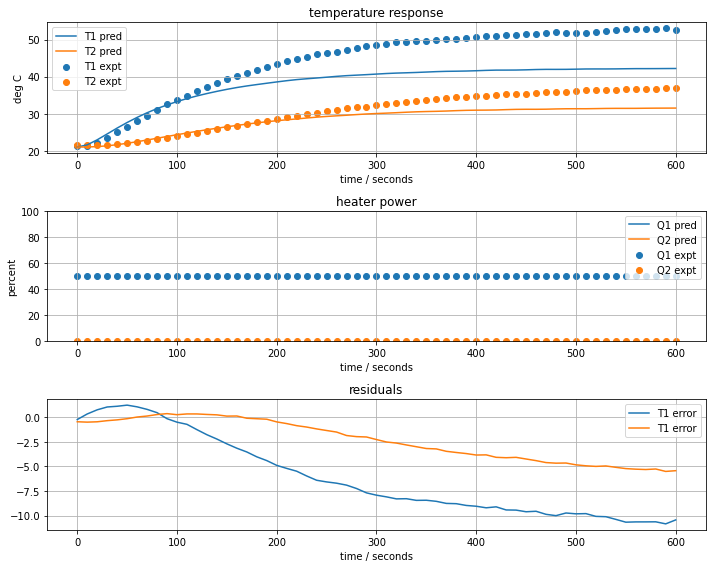

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# adjustable parameters
CpH = 5                # joules/deg C
CpS = 1                # joules/deg C
Ua = 0.05              # watts/deg C
Ub = 0.05              # watts/deg C
Uc = 0.05              # watts/deg C

def model_energy_fourth_order(param, plot=False):
    # unpack the adjustable parameters
    CpH, CpS, Ua, Ub, Uc = param  

    # model solution
    def deriv(t, y):
        T1H, T1S, T2H, T2S= y
        dT1H = (-(Ua + Ub + Uc)*T1H + Ub*T1S + Uc*T2H + alpha*P1*u1(t) + Ua*T_amb)/CpH
        dT1S = Ub*(T1H - T1S)/CpS
        dT2H = (-(Ua + Ub + Uc)*T2H + Ub*T2S + Uc*T1H + alpha*P2*u2(t) + Ua*T_amb)/CpH
        dT2S = Ub*(T2H - T2S)/CpS
        return [dT1H, dT1S, dT2H, dT2S]

    soln = solve_ivp(deriv, [min(t_expt), max(t_expt)], [T_amb]*4, t_eval=t_expt) 
    
    # create dataframe with predictions
    pred = pd.DataFrame(columns=["T1", "T2", "Q1", "Q2"], index=t_expt)
    pred["T1"] = soln.y[1]
    pred["T2"] = soln.y[3]

    # plot solution
    if plot:
        ax = plot_data(expt, pred)
    
    err1 = np.array(pred["T1"] - expt["T1"])
    err2 = np.array(pred["T2"] - expt["T2"])
    
    return np.concatenate((err1, err2))
    
model_energy_fourth_order([CpH, CpS, Ua, Ub, Uc], plot=True)

CpH = 4.4642229433310705,  CpS = 0.8190620772014501,   Ua = 0.032226735496058236,  Ub = 0.01862452210295832,  Uc = 0.033554024370968105


array([-0.221     ,  0.10032875,  0.05752008, -0.00405231, -0.10773464,
        0.01920575,  0.02181627,  0.03268211,  0.05934022, -0.12621606,
       -0.02560712,  0.22155593,  0.1591108 ,  0.12013875,  0.14267453,
        0.09875163,  0.08540225,  0.13037096,  0.05135871,  0.04902892,
       -0.09703112, -0.09303583, -0.06500128, -0.20674525, -0.32566391,
       -0.22615469, -0.12616143, -0.08732116, -0.16917961, -0.37119119,
       -0.39871904, -0.38303497, -0.3863195 , -0.15266185, -0.13605994,
        0.01670928,  0.02122981, -0.05314745,  0.08779108,  0.06239935,
        0.09510954,  0.02842961,  0.244774  ,  0.09824684,  0.2274448 ,
        0.14545713,  0.23302579, -0.01549275, -0.04315274,  0.31607625,
        0.29086137,  0.36550651,  0.18295226,  0.25477598,  0.05819174,
       -0.19055652, -0.12624109, -0.06348875, -0.00238632, -0.16838589,
        0.27369513, -0.446     , -0.50119113, -0.51353834, -0.49453376,
       -0.52704126, -0.5249296 , -0.46191438, -0.43668769, -0.33

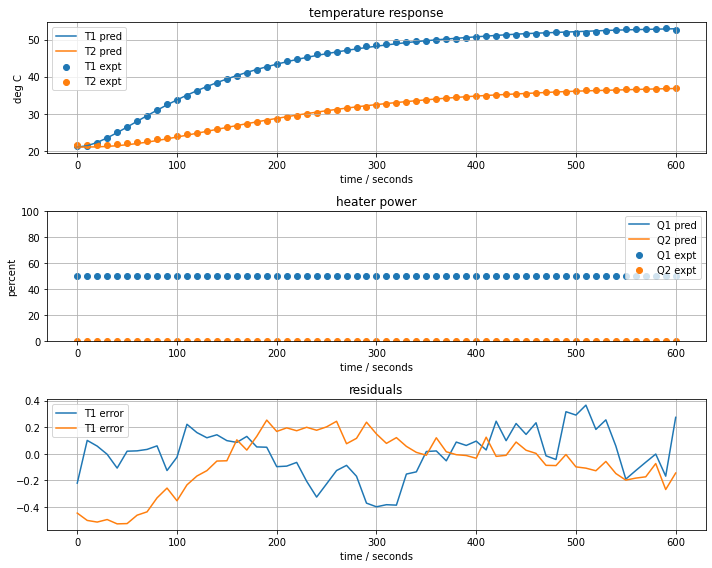

In [14]:
results = least_squares(model_energy_fourth_order,  [CpH, CpS, Ua, Ub, Uc])
CpH, CpS, Ua, Ub, Uc = results.x
print(f"CpH = {CpH},  CpS = {CpS},   Ua = {Ua},  Ub = {Ub},  Uc = {Uc}")
model_energy_fourth_order(results.x, True)

## Lab Assignment 2: Identification of a Multi-input, Multi-output Model for the Temperature Control Laboratory

Create one or more notebooks to show your results for the following exercises. The model you develop in this exercise will be used in the remainder of the semester for simulation and control design for your copy of the Temperature Control Laboratory.

### Exercise 1.

Write two python functions, one called u1(t) and the other u2(t), that create the following input signals that will be used to test the Temperature Control Lab.

* u1(t) and u2(t) are initially zero.
* At time t=20, u1(t) jumps to 60% power, u2(t) remains at zero.
* At time t=620, u2(t) jumps to 60% power, u1(t) remains at 60.
* At time t=1020, u1(t) returns to 0, u2(t) remains at 60.
* At time t=1420, u2(t) returns to zero. Experiment is over.

Develop these functions, and plot the results for t=-100 to t=1800 (yes, beyond the end of the experiment) showing correct performance.

### Exercise 2.

Use the functions created in Exercise 1 to obtain experimental data for your Temperature Control Lab. This will take some time (about 1/2 hour if everything works perfectly). Record T1, T2, Q1, Q2 using the Historian. Be careful to ...

* Set P1=200, P2=100 before the experiment begins
* Let the device reach equilibrium with ambient temperture before starting. Allow at least 10 minutes. Don't shortcut this (as tempting as that may be) since you will only get data that provide headaches later. "Go slow to go fast."
* You might use the box the kit came in to put a little "tent" over the device to protect from air currents.
* Before starting, be sure the heat sinks are not touching, and that everything looks in good shape.
* If your thermal paste looks like it is melting, stop the experiment immediately. Lower P1 and P2 by 25% and start over. Note this in your lab report.

Save this data to a .csv file. 

### Exercise 3.

To avoid overwriting or damaging the data you collected in Exercise 2, create a separate notebook for model fitting. Fit two models to your data:

* Fit the first-order plus delay model to the results for "T1" using data up to t=620 (i.e, the data before you turn on the second heater.).  What are the gain, time-constant, and time delay for your device?

* Fit the fourth-order model (alternatively, the state-space model if you're comfortable with that formulation), and report all heat capacities, heat transfer coefficients. Note that you're fitting a two-input, two-output model which is very challenging. So the fit may not look quite as good as those shown above when u2(t) was held constant.